# Descriptive Statistics

### Basic Definitions

* Data Types
    * **Quantitative** data takes on numeric values that allow us to perform mathematical operations (like the number of dogs).
        * **Continuous** data can be split into smaller and smaller units, and still a smaller unit exists. An example of this is the age of the dog - we can measure the units of the age in years, months, days, hours, seconds, but there are still smaller units that could be associated with the age.
        * **Discrete** data only takes on countable values. The number of dogs we interact with is an example of a discrete data type.
    * **Categorical** are used to label a group or set of items (like dog breeds - Collies, Labs, Poodles, etc.).
        * **Categorical Ordinal** data take on a ranked ordering (like a ranked interaction on a scale from Very Poor to Very Good with the dogs).
        * **Categorical** Nominal data do not have an order or ranking (like the breeds of the dog).
* Analyzing Data
    * Quatitative Data
        * Measures of Center
        * Measures of Spread
        * Shape of the Data
        * Outliers
    * Qualitative Data
        * Proportions
        * Counts
* Summary Statistics
    * **Measures of Cetner** (give notion of average)
        * *Mean*
            * Expected value
            * Sum divided by the number of items
        * *Median*
            * Splits data so that 50% of values are lower and 50% higher
            * Odd numbered set = middle number
            * Even numbered set = average of middle values
        * *Mode*
            * Most frequently observed value in a dataset
    * **Measures of Spread**
        * *Range*
            * Difference between the maximum and minimum values
        * *Interquartile Range - IQR*
            * Difference between Q1 (first quartile) and Q3 (third quartile)
        * *Standard Deviation*
            * Average distance of each observation from the mean
            * Square root of the variance
        * *Variance*
            * Average squareddifferene of each observation from the mean
            * Squared to ensure the differences between values and the mean are not negated
                * E.g., $\mu=5$ and $x_1=3$ and $x_2=7$ would result in: $(\mu-x_1) + (\mu-x_2) = 0$
    * Aggregation
        * A way to turn multiple numbers into a few numbers, e.g., summation (discrete) or integration (continuous)
    * Visualization
        * *Histogram*
            * Bin values
            * Count the number of values within each bin and dispaly counts as bars
        * *5 Number Summary - Box Plot*
            * Minimum
                * Smallest number in a dataset
            * Q1 - First Quartile
                * Value such that 25% of the data falls below this value
                * Think of it as the median for values less than the median
            * Q2 - Median
                * Value such that 50% of the data falls below and above this value
            * Q3 - Third Quartile
                * Value such that 75% of the data falls below this value
                * Think of it as the median for values greater than the median
            * Maximum
                * Largest value in a dataset

[Writing LaTex in Notebooks](https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook)

### Measures of Spread

For a random variable $X$ sampled $n$ times:

##### Mean

$\mu = \bar{x} = \frac{1}{n}\sum\limits^n_{i=1}{x_i}$

##### Standard Deviation

$\sigma = \sqrt{\frac{1}{n}\sum\limits^n_{i=1}(x_i - \bar{x})^2}$

NOTE: In the denominator, $n-1$ is used for a sample while $n$ is used for entire population statistics.

##### Variance

$\sigma^2 = \frac{1}{n}\sum\limits^n_{i=1}(x_i - \bar{x})^2$

In [17]:
import numpy as np
import pandas as pd

from scipy.stats import skewnorm
import matplotlib.pyplot as plt

In [3]:
arr = np.array([1, 5, 10, 3, 8, 12, 4])
avg = np.average(arr)
diffs = arr - avg
sqdiffs = np.square(diffs)
var = np.sum(sqdiffs)/arr.size
print('variance:', var)
std = np.sqrt(var)
print('std:', std)

variance: 13.551020408163266
std: 3.6811710647786073


##### Why use standard deviation?

Standard deviation allows us to compare datasets using a single value. The number immediately lets us compare the spread to determine which dataset is more spread out than the other.

As an example, when data are related to the economy, higher variance is associated with greater risk. Other examples include determining th significance of drugs in medical studies or measures of error in our predictions regarding the amount of rainfall we expect tomorrow or our commute time.

* *Variance* is used to compare the spread of different groups.
    * Higher variance means greater spread... but be mindful of outlier(s).
* *Standard deviation* is used more often in practice as its units match the units in the original dataset.
    * Fair comparisons require the same units between datasets.

### Quiz

| | Year 1 | Year 2 | Year 3 | Year 4 | Year 5 | Year 6 |
| --- | --- | --- | --- | --- | --- | --- |
| Investment 1 | 5% | 5% | 5% | 5% | 5% | 5% |
| Investment 2 | 12% | -2% | 10% | 0% | 7% | 3% |

In [4]:
pd.set_option('display.precision', 2)
investments = [{'Year 1': 5, 'Year 2': 5, 'Year 3': 5, 'Year 4': 5, 'Year 5': 5, 'Year 6': 5},
               {'Year 1': 12, 'Year 2': -2, 'Year 3': 10, 'Year 4': 0, 'Year 5': 7, 'Year 6': 3}]
df = pd.DataFrame(investments, index=['Investment 1', 'Investment 2'])
df.T.describe()

,Investment 1,Investment 2
count,6.0,6.00
mean,5.0,5.00
std,0.0,5.59
min,5.0,-2.00
25%,5.0,0.75
50%,5.0,5.00
75%,5.0,9.25
max,5.0,12.00


In [13]:
x = np.array([15,4,3,8,15,22,7,9,2,3,3,12,6])

pd.DataFrame(x).describe()

,0
count,13.00
mean,8.38
std,6.06
min,2.00
25%,3.00
50%,7.00
75%,12.00
max,22.00


### Shape

| Shape | Mean vs. Median | Real World Applications |
| --- | --- | --- |
| Symmetric (Normal) | Mean = Median | Height, Weight, Errors, Precipitation |
| Right-skewed | Mean > Median | Drug remaining in blood stream, time between phone calls at a call center, distribution of wealth |
| Left-skewed | Mean < Median | GPA, Age of death, Asset price changes |

##### Symmetric (Normal)

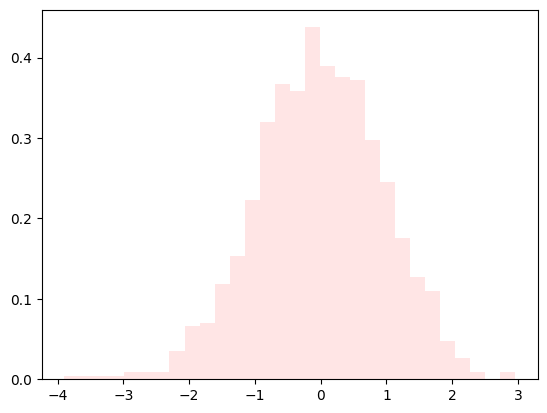

In [18]:
maxValue = 100

random = np.random.randn(1000)

plt.hist(random, 30, density=True, color='red', alpha=0.1)
plt.show()

##### Left Skew

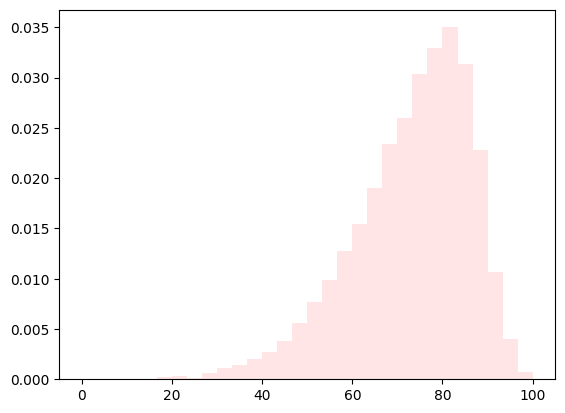

In [20]:
numValues = 10000
maxValue = 100
skewness = -5 # Negative values are left skewed

# Generate random values
random = skewnorm.rvs(a=skewness, size=numValues, loc=maxValue)

random = random-min(random) # Shift values to start at 0
random = random/max(random) # Scale values between 0 and 1
random = random*maxValue # Scale values between 0 and maxValue

# Plot the distribution
plt.hist(random, 30, density=True, color='red', alpha=.1)
plt.show()

##### Right Skew

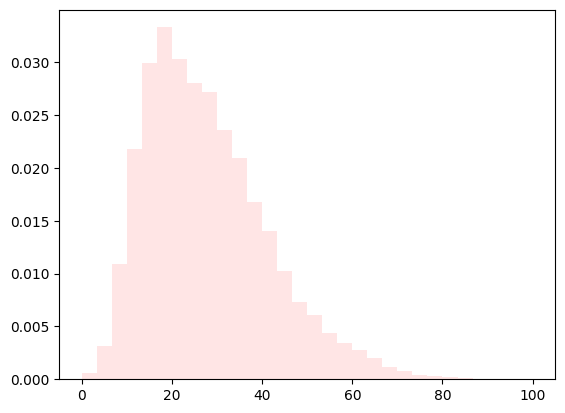

In [22]:
numValues = 10000
maxValue = 100
skewness = 5 # Positive values are righ skewed

# Generate random values
random = skewnorm.rvs(a=skewness, size=numValues, loc=maxValue)

random = random-min(random) # Shift values to start at 0
random = random/max(random) # Scale values between 0 and 1
random = random*maxValue # Scale values between 0 and maxValue

# Plot the distribution
plt.hist(random, 30, density=True, color='red', alpha=.1)
plt.show()

### Outliers

**Outliers** are points that fall vry far from the rest of our data points. These points will influence measures like mean and standard deviation much more than measures associated with the five number summary.

[Identifying Outliers](http://d-scholarship.pitt.edu/7948/1/Seo.pdf)

##### How to handle outliers?

* Note that they exist and understandt the impact on summary statistics.
* If type, remove or fix it.
* Understand why the exist and the impact on questions we are trying to answer about our data.
* Reporting the 5 number summary values is often a better indication than measures like the mean and standard deviation when we have outliers.
* Be careful in reporting. Know how to ask the right questions.

##### Outlier Advice

* Plot your data to identify if you have outliers.
* Handle outliers via the methods above accordingly.
* If no outliers and your data follow a normal distribution, use the mean and standard deviation to describe your dataset. Report that the data are normally distributed.
    * To determine if your data are normally distributed, there are plots called [normal quatile plots](http://data.library.virginia.edu/understanding-q-q-plots/) and statistical methods like the [Kolmogorov-Smirnov Test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) to help you.
* If you have skewed data or outliers, use the five number summary to summarize your data and report the outliers.

### Descriptive vs Inferential Statistics

**Descriptive statistics** is about describing our collected data.

**Inferential statistics** is about using our collected data to draw conclusions about a larger population

* *Population* - our entire group of interest
* *Parameter* - numeric summary about a population
* *Sample* - subset of the population
* *Statistic* - numeric summary about a sample

##### Example

Question - What percentage of students in Texas drink coffee?

* Population - 100,000 students
* Sample - 5000 students
* Statistics - 73%
* Parameter - Proportion of all 100,000 students that drink cofee

Drawing conclusions about a parameter based on statistics is known as inference.